# Set Up

In [1]:
import pandas as pd
from time import time
import datetime

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_json('ultimate_data_challenge.json')

# Initial Data Exploration

In [9]:
logins = pd.read_json('logins.json')

In [10]:
logins.shape

(93142, 1)

In [11]:
logins.head(5)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [12]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


## Aggregating the log ins to 15 minute bins

Set the login time to the index so we can resample. 

In [13]:
logins.set_index('login_time', inplace=True)

adding a column to count

In [14]:
logins['login_count'] = 1

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html
Downsample the series into 15 minute bins and sum the values of the timestamps falling into a bin.

In [15]:
logins_15mins_df = logins.resample('15T').sum()


In [16]:
logins_15mins_df

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [17]:
logins_15mins_df.value_counts(sort=False)

login_count
0              407
1              638
2              726
3              703
4              706
              ... 
60               2
63               1
64               1
66               1
73               1
Length: 62, dtype: int64

In [18]:
initial_timestamp = logins_15mins_df.index[0]

In [19]:
day_delta = datetime.timedelta(days=1)



In [20]:
initial_timestamp = initial_timestamp + datetime.timedelta(hours=4)

### giving the 15 minute bins hour/day/month labels

In [21]:
logins_15mins_df.index.name = 'time_window'
logins_15mins_df.reset_index(inplace=True)

In [22]:
logins_15mins_df['day'] = logins_15mins_df.time_window.dt.day_name()
logins_15mins_df['hour'] = logins_15mins_df.time_window.dt.hour
logins_15mins_df['month'] = logins_15mins_df.time_window.dt.month

# Build out day of the week counts

In [23]:
# aggregate by day of week 
day_counts = logins_15mins_df.groupby('day').sum()

# drop 'hour' column
day_counts.drop('hour', axis=1, inplace=True)

#sort values from greatest to least
day_counts.sort_values('login_count', ascending=False)

,login_count,month
day,,
Saturday,19377,3168
Sunday,18167,3360
Friday,15208,3168
Thursday,11960,3088
Wednesday,10339,3072
Tuesday,9268,2976
Monday,8823,3280


### Hour time series

In [24]:
# aggregate by hour of day
hour_counts = logins_15mins_df.groupby('hour').sum()

# sort values from greatest to least
hour_counts.sort_values('login_count', ascending=False)

,login_count,month
hour,,
22,6607,912
1,6317,924
23,6058,912
0,5993,924
2,5800,924
11,5799,924
21,5623,912
4,5034,924
12,4964,924


# Explore resultant time series

## Log ins per hours across all data

In [25]:
# aggregate by hour of day
hour_counts = logins_15mins_df.groupby('hour').sum().drop(columns='month')

# sort values from greatest to least
hour_counts.sort_values('login_count', ascending=False)

,login_count
hour,
22,6607
1,6317
23,6058
0,5993
2,5800
11,5799
21,5623
4,5034
12,4964


The heaviest usage hours are all aggregated in the evening. Suggesting that folks use ultimate more for recreation than for commuting. Particularly since typical commute hours like 7,8,9 and 16,17,18 are all near the bottom of the list.

## log ins per day

In [26]:
# aggregate by day of week 
day_counts = logins_15mins_df.groupby('day').sum()

# drop 'hour' column
day_counts.drop('hour', axis=1, inplace=True)

#sort values from greatest to least
day_counts.sort_values('login_count', ascending=False)

,login_count,month
day,,
Saturday,19377,3168
Sunday,18167,3360
Friday,15208,3168
Thursday,11960,3088
Wednesday,10339,3072
Tuesday,9268,2976
Monday,8823,3280


Weekends are our heaviest use, then it drops heavily for monday and slowly climbs again as we approach the weekend again

## log ins per day by hour

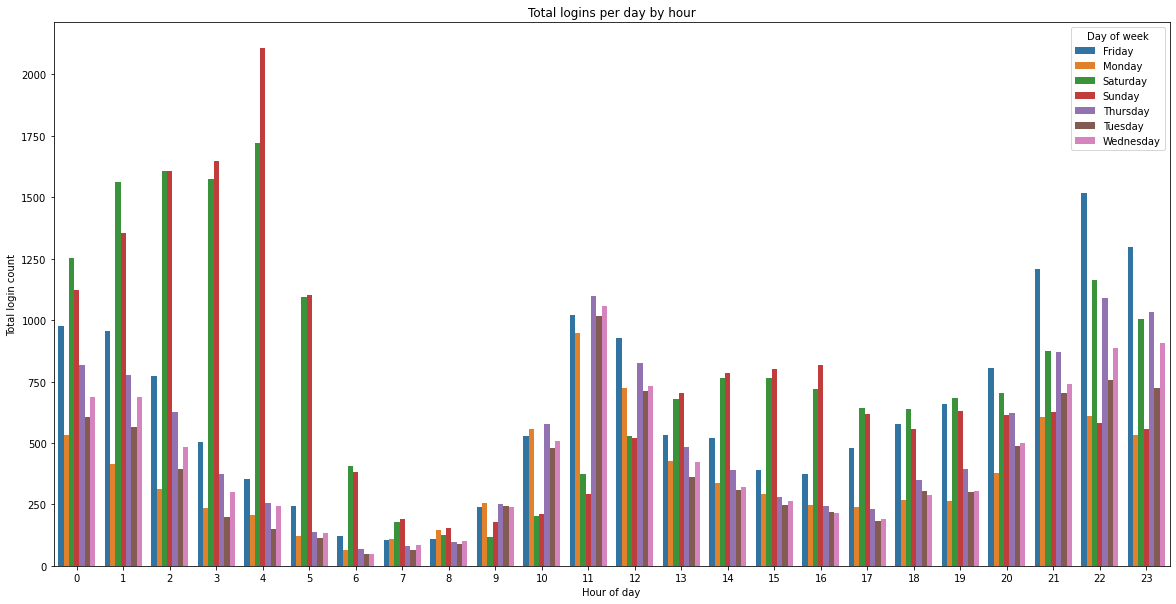

In [27]:
# plot login count by hour of day for each day of the week 

hour_day_df = logins_15mins_df.groupby(['hour', 'day']).sum().reset_index()

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x='hour', y='login_count', data=hour_day_df, hue='day')
ax.legend(title='Day of week' ,loc='upper right')
ax.set(xlabel= 'Hour of day', ylabel= 'Total login count', title="Total logins per day by hour")

plt.show()

Looks like the trends we saw reflected in the total hourly data are reflected in the hourly data broken out by weekday, but the effects appear more extreme as we get closer to the weekend. There's more activity later at night on weekends

## log ins per day, by month

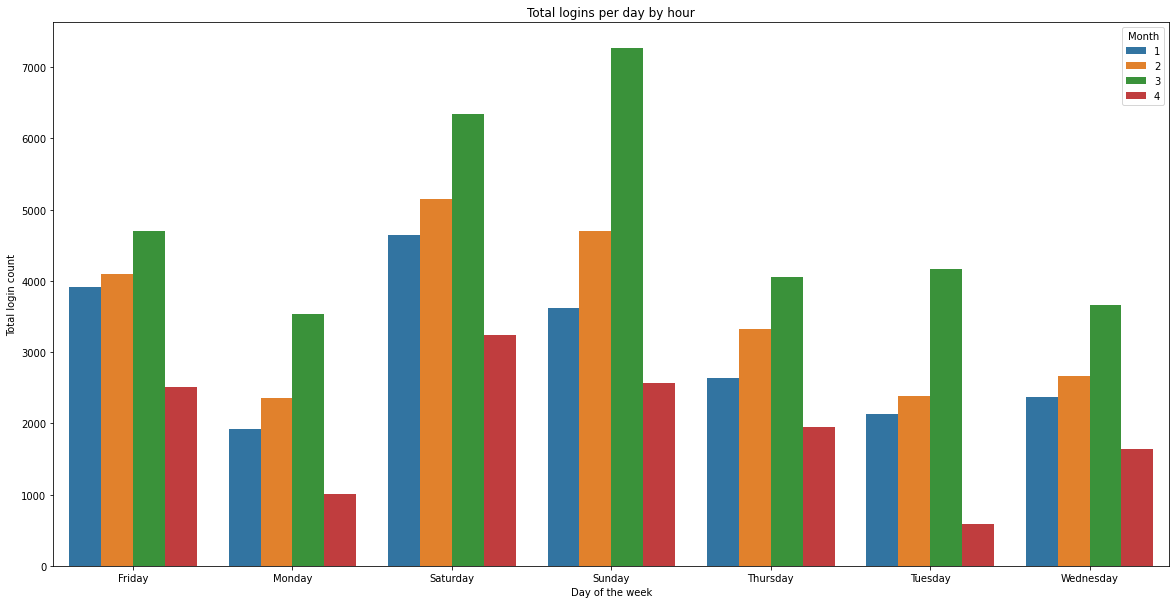

In [28]:
# plot login count by hour of day for each day of the week 

month_day_df = logins_15mins_df.groupby(['month', 'day']).sum().reset_index()

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x='day', y='login_count', data=month_day_df, hue='month')
ax.legend(title='Month' ,loc='upper right')
ax.set(xlabel= 'Day of the week', ylabel= 'Total login count', title="Total logins per day by hour")

plt.show()

Here we see that the trends were consistent across months, just that march was their busiest month.

# Summary of time series findings

We found a few key things.

Usage is higher on the weekend. We also found that usage tends to be higher in the wee hours of the night 11-3 sort of range, and that it tends to be higher and later on the weekends. Weekdays also have some spikes around lunch time 11-1. March was also clearly their buesiest month. More could be done, but this is a decent start

# Pre Processing

# Predictive Modeling

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).